In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import scipy.stats as st
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

np.set_printoptions(precision=2)
pd.set_option('display.max_rows', 200)

In [2]:
#calculate confidence interval
def get_standard_diviation(values):
  mean = np.mean(values)
  n = len(values)
  s = np.sqrt(np.sum((values-mean)**2)/(n-1))

  return s # (mean-2*s, mean+2*s) 

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 11)

## Load data

In [4]:
df = pd.read_csv("C:/Users/python_test/Desktop/Speciale/df_MRI_features_12042022", sep=",", header=0)
df = df.set_index("id")
df = df.drop(["v1: id"],axis=1)

In [5]:
#SKIP FOR FIRST VERSION (limit amount of features)
#var_of_interest = ["v1: Femur (vol)","v1: JWS (approx)", "v1: Img Intensity (mean)", "v1: Tibial Intensity (mean)", "v1: Femur Intensity (mean)", 
#                   "v1: Miniscus Intensity (mean)", "v1: Entropy Tibial", "v1: Entropy Meniscus","v1: Entropy Femur","v1: Closing Femur","v1: Closing Tibial",
#                   "v1: Closing Meniscus","v1: Thick Femur X","v1: Thick Tibial X","v1: Thick Meniscus X",
#                   "v2: Femur (vol)","v2: JWS (approx)", "v2: Img Intensity (mean)", "v2: Tibial Intensity (mean)", "v2: Femur Intensity (mean)", 
#                   "v2: Miniscus Intensity (mean)", "v2: Entropy Tibial", "v2: Entropy Meniscus","v2: Entropy Femur","v2: Closing Femur","v2: Closing Tibial",
#                   "v2: Closing Meniscus","v2: Thick Femur X","v2: Thick Tibial X","v2: Thick Meniscus X",
#                   "v3: Femur (vol)","v3: JWS (approx)", "v3: Img Intensity (mean)", "v3: Tibial Intensity (mean)", "v3: Femur Intensity (mean)", 
#                   "v3: Miniscus Intensity (mean)", "v3: Entropy Tibial", "v3: Entropy Meniscus","v3: Entropy Femur","v3: Closing Femur","v3: Closing Tibial",
#                   "v3: Closing Meniscus","v3: Thick Femur X","v3: Thick Tibial X","v3: Thick Meniscus X", 'y']
var_of_interest = ["v1: Patella (vol)","v1: Medial Tibial (vol)","v1: Lateral Tibial (vol)","v1: Medial Femur (vol)",
                  "v1: Lateral Femur (vol)","v1: Medial Miniscus (vol)","v1: Lateral Miniscus (vol)","v1: JWS (approx)", 
                  "v1: Img Intensity (mean)","v1: Femur Intensity (median)","v1: Miniscus Intensity (median)","v1: Entropy Tibial",
                  "v1: Entropy Meniscus","v1: Entropy Femur","v1: Closing Femur","v1: Closing Tibial","v1: Closing Meniscus",
                  "v1: Thick Femur X","v1: Thick Femur Y","v1: Thick Femur Z","v1: Thick Tibial Y","v1: Thick Tibial Z",
                  "v1: Thick Meniscus X","v1: Thick Meniscus Y",
                  "v2: Patella (vol)","v2: Medial Tibial (vol)","v2: Lateral Tibial (vol)","v2: Medial Femur (vol)",
                  "v2: Lateral Femur (vol)","v2: Medial Miniscus (vol)","v2: Lateral Miniscus (vol)","v2: JWS (approx)", 
                  "v2: Img Intensity (mean)","v2: Femur Intensity (median)","v2: Miniscus Intensity (median)","v2: Entropy Tibial",
                  "v2: Entropy Meniscus","v2: Entropy Femur","v2: Closing Femur","v2: Closing Tibial","v2: Closing Meniscus",
                  "v2: Thick Femur X","v2: Thick Femur Y","v2: Thick Femur Z","v2: Thick Tibial Y","v2: Thick Tibial Z",
                  "v2: Thick Meniscus X","v2: Thick Meniscus Y",
                  "v3: Patella (vol)","v3: Medial Tibial (vol)","v3: Lateral Tibial (vol)","v3: Medial Femur (vol)",
                  "v3: Lateral Femur (vol)","v3: Medial Miniscus (vol)","v3: Lateral Miniscus (vol)","v3: JWS (approx)",
                  "v3: Img Intensity (mean)","v3: Femur Intensity (median)","v3: Miniscus Intensity (median)","v3: Entropy Tibial",
                  "v3: Entropy Meniscus","v3: Entropy Femur","v3: Closing Femur","v3: Closing Tibial","v3: Closing Meniscus",
                  "v3: Thick Femur X","v3: Thick Femur Y","v3: Thick Femur Z","v3: Thick Tibial Y","v3: Thick Tibial Z",
                  "v3: Thick Meniscus X","v3: Thick Meniscus Y",'y']
    
df = df[var_of_interest]
df["id"]=df.index
#df=df.set_index("id")

### Separate into val and train set

In [6]:
TRAIN = pd.read_csv("matched_15032022", sep=",", header=0)
TRAIN = TRAIN.set_index("Unnamed: 0")
TRAIN = TRAIN.index

VAL = pd.read_csv("validation_15032022", sep=",", header=0)
VAL = VAL.set_index("Unnamed: 0")
VAL = VAL.index

In [7]:
print("All: ", df.shape )

df["id"] = [int(i[:7]) for i in df.index]

# Select validation or training mode VAL or TRAIN
train = df.loc[ df['id'].isin(TRAIN)]
val = df.loc[~df['id'].isin(TRAIN)]

train = train.drop(["id"],axis=1)
val = val.drop(["id"],axis=1)

print("Train", train.shape)
print("Val", val.shape)
train.shape[0]+val.shape[0]

y = train["y"]
train= train.drop(["y"],axis=1)

y_val = val["y"]
val= val.drop(["y"],axis=1)

All:  (1189, 74)
Train (973, 73)
Val (216, 73)


In [8]:
X= np.array(train)
X_val= np.array(val)

# correlation

C:\Users\python_test\anaconda3\envs\speciale\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
C:\Users\python_test\anaconda3\envs\speciale\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


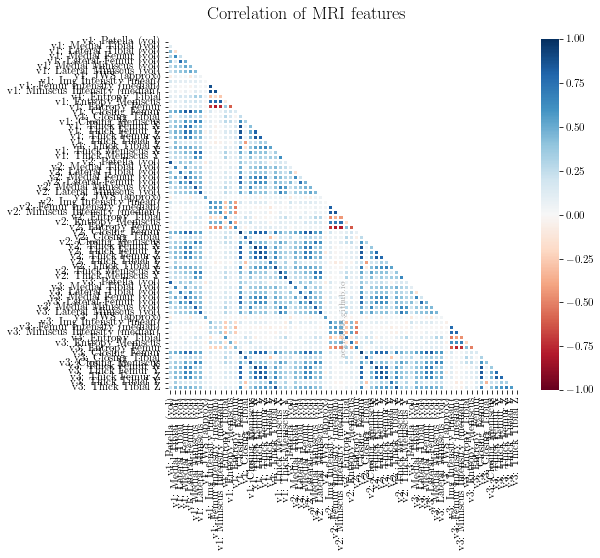

In [9]:
import seaborn as sns
corr = train.iloc[:, :-2].corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, mask=mask, cmap="RdBu", vmin=-1, vmax=1, center=0, linewidths=.3)

fig.suptitle('Correlation of MRI features', fontsize=18)
#plt.rc('font', size = 9)
ax.text(0.5, 0.2, 'aegis4048.github.io', ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.7,rotation='vertical', fontsize=9)
#plt.rc('font', size = 11)
fig.set_size_inches((22 / 2.54, 20 / 2.54))

fig.tight_layout()
#fig.savefig('clincalfeat.png', dpi='figure')#,dpi=600)#, format='png')# , dpi=600)
fig.savefig('corrimage.pdf')  # Saving plot to pdf file
fig.show()
plt.rc('font', size = 11)

### Define Stratified k-Fold CV

In [10]:
# make stratified KFOLD 
n_split=10

skf = StratifiedKFold(n_splits=n_split, shuffle=False)

# Random Forest

In [11]:
# make stratified KFOLD 
n_split=10
mean = 0
data =[]
preds_stat= np.array([])

for train_index, test_index in skf.split(X, y):
    Xtrain = X[train_index]
    ytrain = y[train_index]
    Xtest = X[test_index]
    ytest = y[test_index]
    
    #normalize data 
    m = np.mean(Xtrain,axis=0)
    std = np.std(Xtrain, axis =0)
    Xtrain = np.array((Xtrain - m )/std)
    Xtest = np.array((Xtest - m )/std)
    
    reg = RandomForestClassifier(max_depth=20).fit(Xtrain, ytrain)
    ypred = reg.predict(Xtest)
#    ypred = np.where(ypred<0,0, ypred)

    preds_stat = np.concatenate([preds_stat,ypred])

    print("Accuracy Score: ", roc_auc_score(ytest.astype(float), ypred))
    #print("Accuracy Score!: ",accuracy_score(ytest, ypred.round()))
    mean += roc_auc_score(ytest.astype(float), ypred)
    data.append(roc_auc_score(ytest.astype(float), ypred))
    
    
print("Mean accuracy score: ", mean/n_split)
print("SSE: ", get_standard_diviation(data) )
print("All: ", data)

Accuracy Score:  0.5322966507177034
Accuracy Score:  0.5873205741626795
Accuracy Score:  0.6363636363636364
Accuracy Score:  0.5172305764411027
Accuracy Score:  0.605889724310777
Accuracy Score:  0.5278822055137845
Accuracy Score:  0.5215151515151514
Accuracy Score:  0.5775757575757576
Accuracy Score:  0.6163636363636363
Accuracy Score:  0.5642424242424243
Mean accuracy score:  0.5686680337206653
SSE:  0.042876356866477665
All:  [0.5322966507177034, 0.5873205741626795, 0.6363636363636364, 0.5172305764411027, 0.605889724310777, 0.5278822055137845, 0.5215151515151514, 0.5775757575757576, 0.6163636363636363, 0.5642424242424243]


In [12]:
#np.savetxt('C:/Users/python_test/Desktop/Speciale/RF_mri.csv', preds_stat.astype(int), delimiter=',')   
#np.savetxt('C:/Users/python_test/Desktop/Speciale/y_mri.csv', y, delimiter=',')   

### Validate

In [13]:
m = np.mean(X,axis=0)
std = np.std(X, axis =0)
X = (X - m )/std
X_val = (X_val - m )/std

reg = RandomForestClassifier(max_depth=20).fit(X, y)
ypred = reg.predict(X_val)

print("Accuracy Score: ", roc_auc_score(y_val.astype(float), ypred))

Accuracy Score:  0.6267206477732793


# Kfold of Linear regression

In [14]:
mean = 0
data =[]
preds_stat=np.array([])

for train_index, test_index in skf.split(X, y):
    Xtrain = X[train_index]
    ytrain = y[train_index]
    Xtest = X[test_index]
    ytest = y[test_index]
    
    #normalize data 
    m = np.mean(Xtrain,axis=0)
    std = np.std(Xtrain, axis =0)
    Xtrain = np.array((Xtrain - m )/std)
    Xtest = np.array((Xtest - m )/std)
    
    reg = LinearRegression().fit(Xtrain, ytrain)
    ypred = reg.predict(Xtest)
    ypred = np.where(ypred<0,0, ypred)
  
    preds_stat = np.concatenate([preds_stat,ypred])

    print("Accuracy Score: ", roc_auc_score(ytest.astype(float), ypred))
    mean += roc_auc_score(ytest.astype(float), ypred)
    data.append(roc_auc_score(ytest.astype(float), ypred))
    
print("Mean accuracy score: ", mean/n_split)
print("Confidence interval: ", get_standard_diviation(data))

Accuracy Score:  0.8026315789473685
Accuracy Score:  0.8797846889952153
Accuracy Score:  0.7174043062200958
Accuracy Score:  0.7866541353383458
Accuracy Score:  0.8515037593984962
Accuracy Score:  0.8308270676691729
Accuracy Score:  0.7227272727272727
Accuracy Score:  0.7012121212121212
Accuracy Score:  0.8654545454545455
Accuracy Score:  0.7678787878787878
Mean accuracy score:  0.7926078263841421
Confidence interval:  0.06452852489862267


In [15]:
#np.savetxt('MLinR_mri.csv', preds_stat, delimiter=',')   

### Validate

In [16]:
#normalize
m = np.mean(X,axis=0)
std = np.std(X, axis =0)
X = (X - m )/std
X_val = (X_val - m )/std

reg = LinearRegression()
reg = reg.fit(X, y)
ypred = reg.predict(X_val)

print("Accuracy Score: ", roc_auc_score(y_val.astype(float), ypred))

Accuracy Score:  0.8554655870445345


## Make one big Linear regression

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.20, random_state=True, shuffle=True)

m = np.mean(Xtrain,axis=0)
std = np.std(Xtrain, axis =0)
Xtrain = np.array((Xtrain - m )/std)
Xtest = np.array((Xtest - m )/std)

reg = LinearRegression().fit(Xtrain, ytrain)
ypred = reg.predict(Xtest)
ypred = np.where(ypred<0,0, ypred)
    
print("Accuracy Score: ", roc_auc_score(ytest.astype(float), ypred))
#print("Coefficients: \n", reg.coef_)
print("incept", reg.intercept_)

Accuracy Score:  0.8570138470800721
incept 0.22236503856041134


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix( ytest,ypred.round())

array([[143,   8],
       [ 26,  18]], dtype=int64)

In [19]:
# Get corefficients
params = reg.coef_

# Add row to constants
newX = pd.DataFrame({"Constant":np.ones(len(Xtest))}).join(pd.DataFrame(Xtest))

# #calculate std 
m = np.mean(newX, axis=0)
n = len(newX)
std = np.sqrt(np.sum((newX-m)**2, axis=0)/(n))

#Add incepts
params = np.append(reg.intercept_,params)

t_values = params/std

# set se of incept to 0
std[0] = 0
std=np.array(std)
t_values[0] = 0
t_values = np.array(t_values)

myDF3 = pd.DataFrame()
myDF3["Coefficients"]= params
myDF3["Standard Errors"] =std
myDF3["t values"] = t_values
names=["incept"]+list(df.drop(columns=["y","id"]))
myDF3=myDF3.set_index(pd.Index(names))
myDF3

,Coefficients,Standard Errors,t values
incept,0.222365,0.000000,inf
v1: Patella (vol),0.012461,0.000000,0.000000
v1: Medial Tibial (vol),-0.086541,0.804143,-0.107619
v1: Lateral Tibial (vol),-0.066179,0.922064,-0.071772
v1: Medial Femur (vol),0.000683,0.809711,0.000844
v1: Lateral Femur (vol),-0.006982,0.942939,-0.007404
v1: Medial Miniscus (vol),-0.055696,0.939149,-0.059305
v1: Lateral Miniscus (vol),-0.012260,0.965508,-0.012698
v1: JWS (approx),-0.006496,0.962437,-0.006750
v1: Img Intensity (mean),0.098446,0.988577,0.099584


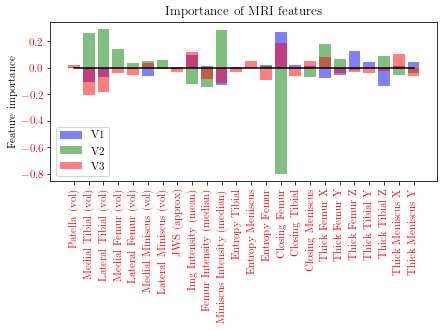

In [20]:
importance = myDF3["t values"][1:]
n=len(importance)//3 #round((len(importance))/2)
# Get variables, connect to weights (#Note remove id and labels)
variables =[i[4:] for i in myDF3.index[1:]]

# plot histograms
plt.figure(figsize=(16 / 2.54, 12/ 2.54))
plt.bar([x for x in range(len(importance[:n]))], importance[:n], alpha=0.5, color="b",label="V1",edgecolor=None)
plt.bar([x for x in range(len(importance[n:2*n]))], importance[n:2*n], alpha=0.5, color="g",label="V2",edgecolor=None)
plt.bar([x for x in range(len(importance[2*n:]))], importance[2*n:], alpha=0.5, color="r",label="V3",edgecolor=None)
plt.xticks([x for x in range(len(importance[2*n:]))], variables[2*n:], rotation =90)
plt.plot(range(n),np.zeros(n),c="black")

#plt.ylim([0,1])
#plt.yscale('symlog')
plt.tick_params(labelcolor='r')#, width=3) #labelsize=10
plt.ylabel("Feature importance") #fontsize=8
plt.title("Importance of MRI features") #fontsize = 12
plt.legend(loc="best") #fontsize=5
plt.tight_layout()

plt.savefig('imgalllinreduced.pdf')  # Saving plot to pdf file

plt.show()


## Logistic regression

In [21]:
mean_list = []
preds_stat = np.array([])

mean = 0
for train_index, test_index in skf.split(X, y):
    Xtrain = X[train_index]
    ytrain = y[train_index]
    Xtest = X[test_index]
    ytest = y[test_index]
    
    m = np.mean(Xtrain,axis=0)
    std = np.std(Xtrain, axis =0)
    Xtrain = (Xtrain - m )/std
    Xtest = (Xtest - m )/std
    
    Log_reg = LogisticRegression(max_iter=20000).fit(Xtrain, ytrain)
    ypred = Log_reg.predict(Xtest)
    y_pred = Log_reg.predict_proba(Xtest)     

    preds_stat = np.concatenate([preds_stat,ypred])

    print("Accuracy Score: ", roc_auc_score(ytest.astype(float), y_pred[:,1]))
    mean +=roc_auc_score(ytest.astype(float), y_pred[:,1])
    mean_list.append(roc_auc_score(ytest.astype(float), y_pred[:,1]))
    
print("Mean accuracy score: ", mean/n_split)  
print("Confidence interval: ", get_standard_diviation(mean_list))

np.savetxt('MLogR_mri.csv', preds_stat, delimiter=',')   

Accuracy Score:  0.7816985645933014
Accuracy Score:  0.8953349282296651
Accuracy Score:  0.7601674641148326
Accuracy Score:  0.7919799498746867
Accuracy Score:  0.8333333333333334
Accuracy Score:  0.81265664160401
Accuracy Score:  0.7030303030303031
Accuracy Score:  0.7012121212121212
Accuracy Score:  0.8545454545454545
Accuracy Score:  0.8090909090909091
Mean accuracy score:  0.7943049669628618
Confidence interval:  0.061681646142729474


### Validate

In [22]:
#normalize
m = np.mean(X,axis=0)
std = np.std(X, axis =0)
X = (X - m )/std
X_val = (X_val - m )/std


#Pred
reg = LogisticRegression(max_iter=1000000000000000)
reg = reg.fit(X, y)
ypred = reg.predict(X_val)

print("Accuracy Score: ", roc_auc_score(y_val.astype(float), ypred))

Accuracy Score:  0.6380566801619434


# LASSO

In [23]:
# make stratified KFOLD 
mean = 0
mean_list =[]
for train_index, test_index in skf.split(X, y):
    Xtrain = X[train_index]
    ytrain = y[train_index]
    Xtest = X[test_index]
    ytest = y[test_index]
    
    m = np.mean(Xtrain,axis=0)
    std = np.std(Xtrain, axis =0)
    Xtrain = (Xtrain - m )/std
    Xtest = (Xtest - m )/std
    
    reg_las = linear_model.Lasso(0.01)
    reg_las.fit(Xtrain, ytrain) 
    ypred = reg_las.predict(Xtest)

    print("Accuracy Score: ", roc_auc_score(ytest.astype(float), ypred))
    mean +=roc_auc_score(ytest.astype(float), ypred)
    mean_list.append(roc_auc_score(ytest.astype(float), ypred))

print("Mean accuracy score: ", mean/n_split)    
print("Confidence Interval: ", get_standard_diviation(mean_list) )

Accuracy Score:  0.8145933014354068
Accuracy Score:  0.8277511961722488
Accuracy Score:  0.7476076555023924
Accuracy Score:  0.7581453634085212
Accuracy Score:  0.8571428571428572
Accuracy Score:  0.8176691729323308
Accuracy Score:  0.7351515151515152
Accuracy Score:  0.703030303030303
Accuracy Score:  0.8151515151515152
Accuracy Score:  0.7957575757575757
Mean accuracy score:  0.7872000455684667
Confidence Interval:  0.04861983346374724


In [24]:
# Get corefficients
params = reg_las.coef_

# Add row to constants
newX = pd.DataFrame({"Constant":np.ones(len(Xtest))}).join(pd.DataFrame(Xtest))

# #calculate std 
m = np.mean(newX, axis=0)
n = len(newX)
std = np.sqrt(np.sum((newX-m)**2, axis=0)/(n))

#Add incepts
params = np.append(reg_las.intercept_,params)

t_values = params/std

# set se of incept to 0
std[0] = 0
std=np.array(std)
t_values[0] = 0
t_values = np.array(t_values)

myDF3 = pd.DataFrame()
myDF3["Coefficients"]= params
myDF3["Standard Errors"] =std
myDF3["t values"] = t_values
names=["incept"]+list(df.drop(columns=["y","id"]))
myDF3=myDF3.set_index(pd.Index(names))
myDF3

,Coefficients,Standard Errors,t values
incept,0.222603,0.000000,inf
v1: Patella (vol),0.000000,0.000000,0.000000
v1: Medial Tibial (vol),-0.000000,1.051354,-0.000000
v1: Lateral Tibial (vol),-0.000000,0.974043,-0.000000
v1: Medial Femur (vol),-0.000000,1.001617,-0.000000
v1: Lateral Femur (vol),-0.000000,0.987541,-0.000000
v1: Medial Miniscus (vol),-0.003002,1.026047,-0.002925
v1: Lateral Miniscus (vol),0.000000,1.081835,0.000000
v1: JWS (approx),-0.000000,1.166024,-0.000000
v1: Img Intensity (mean),0.000000,1.005978,0.000000


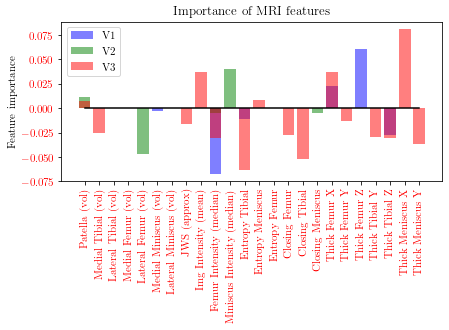

In [25]:
importance = myDF3["t values"][1:]
n=len(importance)//3 #round((len(importance))/2)
# Get variables, connect to weights (#Note remove id and labels)
variables =[i[4:] for i in myDF3.index[1:]]

# plot histograms
plt.figure(figsize=(16 / 2.54, 12/ 2.54))
plt.bar([x for x in range(len(importance[:n]))], importance[:n], alpha=0.5, color="b",label="V1",edgecolor=None)
plt.bar([x for x in range(len(importance[n:2*n]))], importance[n:2*n], alpha=0.5, color="g",label="V2",edgecolor=None)
plt.bar([x for x in range(len(importance[2*n:]))], importance[2*n:], alpha=0.5, color="r",label="V3",edgecolor=None)
plt.xticks([x for x in range(len(importance[2*n:]))], variables[2*n:], rotation =90)
plt.plot(range(n),np.zeros(n),c="black")

#plt.ylim([0,1])
#plt.yscale('symlog')
plt.tick_params(labelcolor='r')#, width=3) #labelsize=10
plt.ylabel("Feature importance") #fontsize=8
plt.title("Importance of MRI features") #fontsize = 12
plt.legend(loc="best") #fontsize=5
plt.tight_layout()

plt.savefig('imgalllas.pdf')  # Saving plot to pdf file

plt.show()


### Validate

In [26]:
reg = linear_model.Lasso(0.03)
reg = reg.fit(X, y)
ypred = reg.predict(X_val)

print("Accuracy Score: ", roc_auc_score(y_val.astype(float), ypred))

Accuracy Score:  0.8617408906882591
